In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
covid_df = pd.read_csv(url, index_col=0)

print(covid_df)


#Change the county or state as per the choice
highlight_county = 'Salt Lake'  
state_name = 'Utah'
county_name = 'Salt Lake'

         iso2 iso3  code3     FIPS      Admin2 Province_State Country_Region  \
UID                                                                            
84001001   US  USA    840   1001.0     Autauga        Alabama             US   
84001003   US  USA    840   1003.0     Baldwin        Alabama             US   
84001005   US  USA    840   1005.0     Barbour        Alabama             US   
84001007   US  USA    840   1007.0        Bibb        Alabama             US   
84001009   US  USA    840   1009.0      Blount        Alabama             US   
...       ...  ...    ...      ...         ...            ...            ...   
84056039   US  USA    840  56039.0       Teton        Wyoming             US   
84056041   US  USA    840  56041.0       Uinta        Wyoming             US   
84090056   US  USA    840  90056.0  Unassigned        Wyoming             US   
84056043   US  USA    840  56043.0    Washakie        Wyoming             US   
84056045   US  USA    840  56045.0      

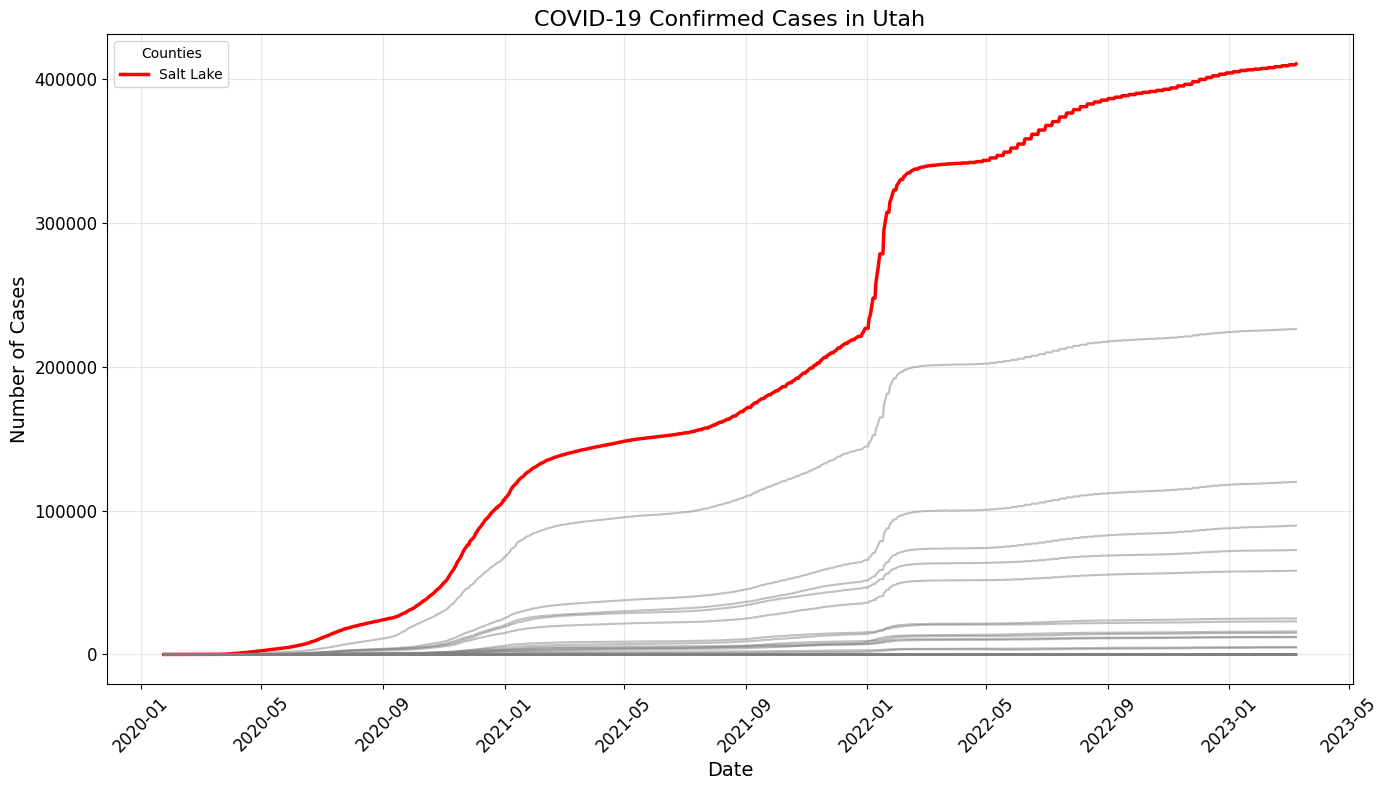

In [43]:
#Create a visualization that shows all of the counties in Utah as a time series,
#similar to the one shown in slide 22 during the lecture. The graphic should
#-Show cases over time
#-Have all counties plotted in a background color (something like grey)
#-Have a single county plotted in a contrasting color (something not grey)
#-Have well formatted dates as the X axis

utah_data = covid_df[covid_df['Province_State'] == state_name]


county_data = utah_data.groupby('Admin2').sum().iloc[:, 11:] 


county_data = county_data.transpose()
county_data.index = pd.to_datetime(county_data.index, format= '%m/%d/%y')  


plt.figure(figsize=(14, 8))

for county in county_data.columns:
    if county == highlight_county:  # Highlight selected county
        plt.plot(county_data.index, county_data[county], label=county, color='red', linewidth=2.5)
    else:  # Plot other counties in grey
        plt.plot(county_data.index, county_data[county], color='grey', alpha=0.5)

# fromat chart
plt.title('COVID-19 Confirmed Cases in Utah', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Cases', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper left', fontsize=10, title='Counties')
plt.grid(alpha=0.3)

# display plot
plt.tight_layout()
plt.show()

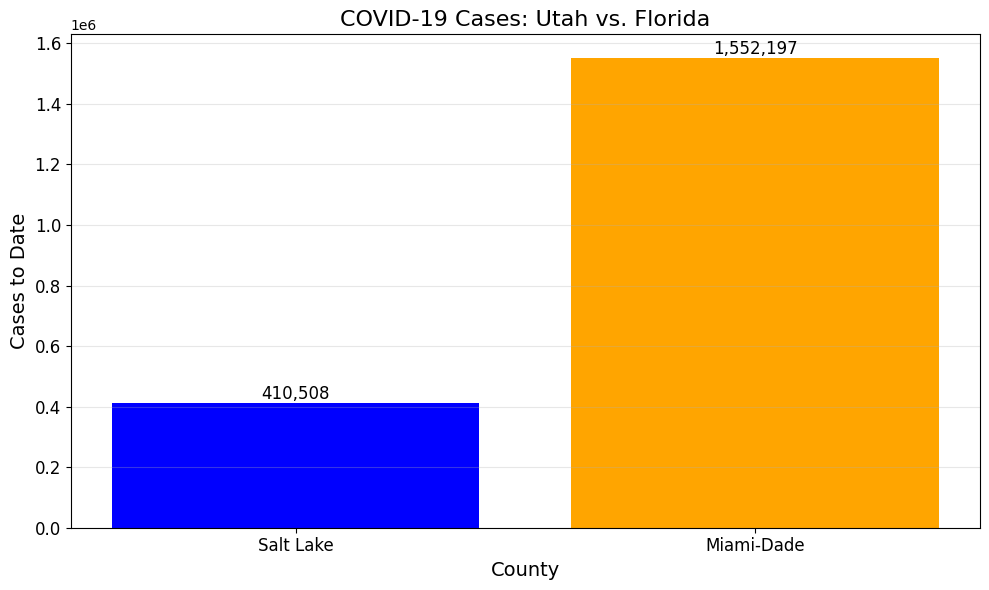

In [47]:
#Create a visualization that shows the contrast between the county in Utah with
#the most cases to date to a county in Florida with the most cases to date.
#The graphic should:
#-Have only two counties plotted
#-Highlight the difference between the two comparison counties
#You may use any style of graphic you like as long as it is effective (dense)
#and readable

utah_data = covid_df[covid_df['Province_State'] == state_name]
florida_data = covid_df[covid_df['Province_State'] == 'Florida']


utah_totals = utah_data.groupby('Admin2').sum().iloc[:, -1]  
florida_totals = florida_data.groupby('Admin2').sum().iloc[:, -1]

# Find the counties with the most cases
utah_top_county = utah_totals.idxmax()
utah_top_cases = utah_totals.max()

florida_top_county = florida_totals.idxmax()
florida_top_cases = florida_totals.max()

# Prepare data for bar chart
counties = [utah_top_county, florida_top_county]
cases = [utah_top_cases, florida_top_cases]
colors = ['blue', 'orange']  # Assign distinct colors to counties

# Plot
plt.figure(figsize=(10, 6))
plt.bar(counties, cases, color=colors)

# Formatting the chart
plt.title('COVID-19 Cases: Utah vs. Florida', fontsize=16)
plt.xlabel('County', fontsize=14)
plt.ylabel('Cases to Date', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.3)


for i, case in enumerate(cases):
    plt.text(i, case + 1000, f'{case:,}', ha='center', va='bottom', fontsize=12, color='black')

# display the plot
plt.tight_layout()
plt.show()

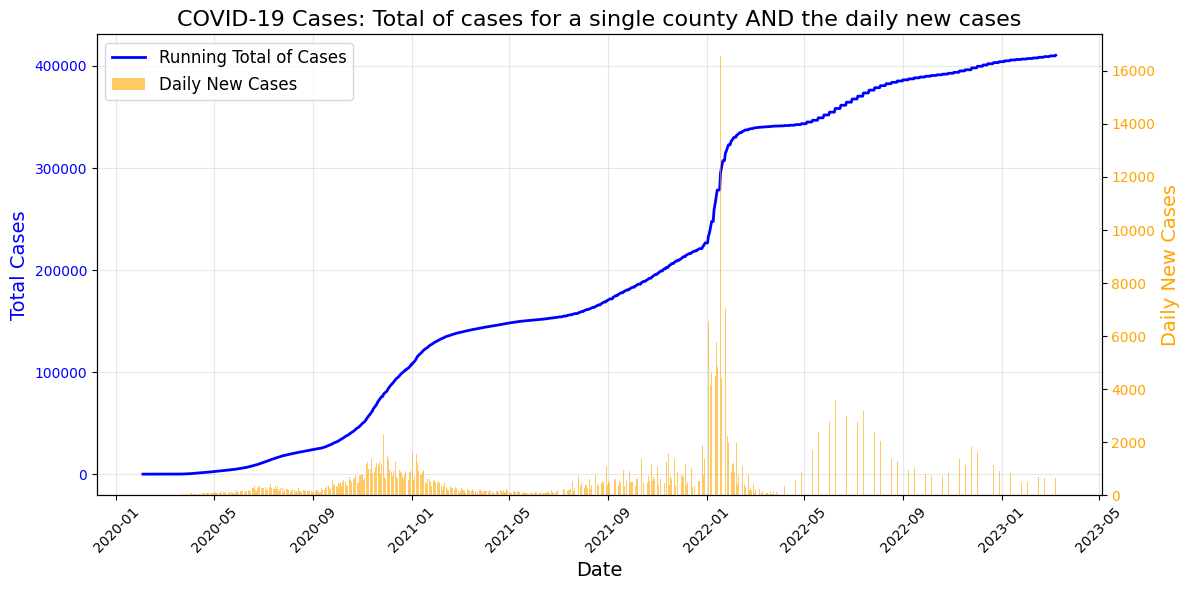

In [48]:
#Create a visualization that shows BOTH the running total of cases for a single
#county AND the daily new cases. The graphic should:
#-Use two y-axes
#(https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html)
#-Use color to contrast the two series being plotted
#-Have well formatted dates as the X axis


county_data = covid_df[(covid_df['Province_State'] == state_name) & (covid_df['Admin2'] == county_name)].iloc[:, 11:]


time_series = county_data.iloc[:, 11:].sum()  
dates = pd.to_datetime(time_series.index, format='%m/%d/%y')  
running_total = time_series.values
daily_new_cases = time_series.diff().fillna(0).values 

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the running total on the y-axis
ax1.plot(dates, running_total, color='blue', label='Running Total of Cases', linewidth=2)
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Total Cases', fontsize=14, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(alpha=0.3)

# Plot the daily new cases on the secondary y-axis
ax2 = ax1.twinx()
ax2.bar(dates, daily_new_cases, color='orange', label='Daily New Cases', alpha=0.6)
ax2.set_ylabel('Daily New Cases', fontsize=14, color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

#title 
plt.title('COVID-19 Cases: Total of cases for a single county AND the daily new cases', fontsize=16)

# Combine both y-axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=12)

# display the plot
fig.tight_layout()
plt.show()

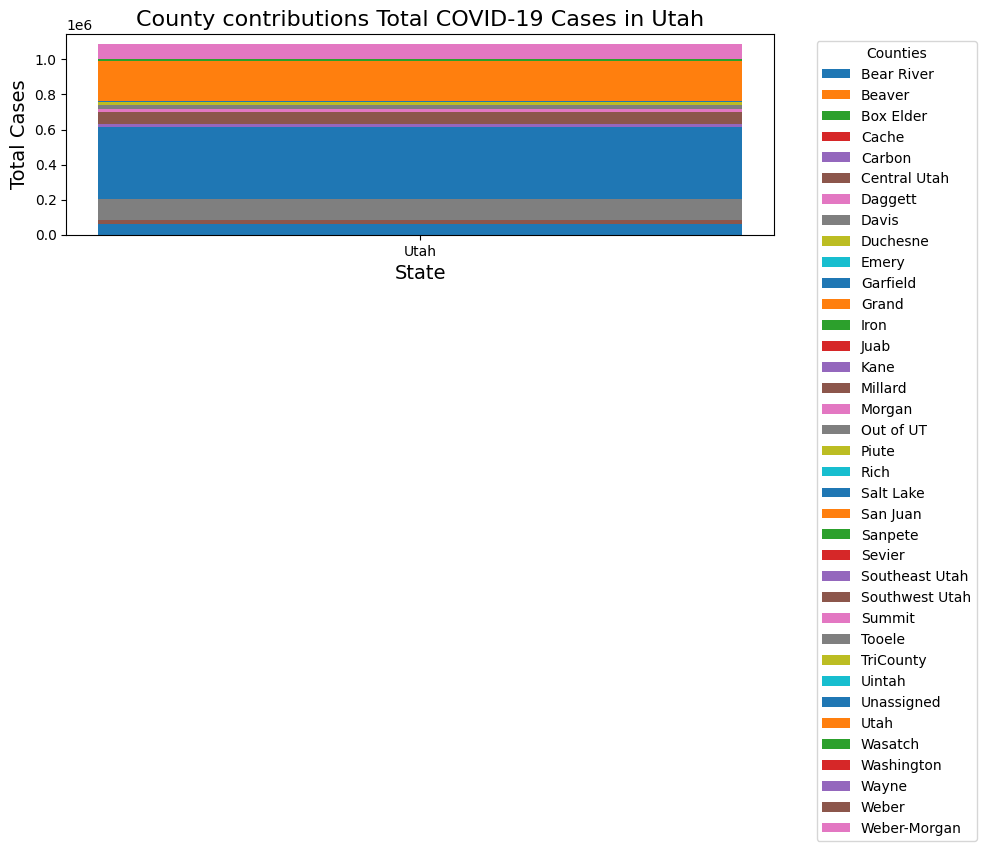

In [46]:
#Create a visualization that shows a stacked bar chart of county contributions
#to a given state's total cases. You may choose any state (or states).
#(https://matplotlib.org/stable/gallery/lines_bars_and_markers/
#bar_stacked.html#sphx-glr-gallery-lines-bars-and-markers-bar-stacked-py)
#The graphic should:
#-Have a single column delineate a state
#-Have each 'slice' or column compontent represent a county

state_data = covid_df[covid_df['Province_State'] == state_name]


county_totals = state_data.groupby('Admin2').sum().iloc[:, -1]  # Most recent total cases
county_names = county_totals.index
total_cases = county_totals.values

# Prepare data for stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot stacked bar chart
bar = ax.bar(state_name, total_cases[0], label=county_names[0])
bottom = total_cases[0]

for i in range(1, len(total_cases)):
    bar = ax.bar(state_name, total_cases[i], bottom=bottom, label=county_names[i])
    bottom += total_cases[i]

# Formatting
ax.set_title(f'County contributions Total COVID-19 Cases in {state_name}', fontsize=16)
ax.set_ylabel('Total Cases', fontsize=14)
ax.set_xlabel('State', fontsize=14)
ax.legend(title="Counties", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# display the plot
plt.tight_layout()
plt.show()

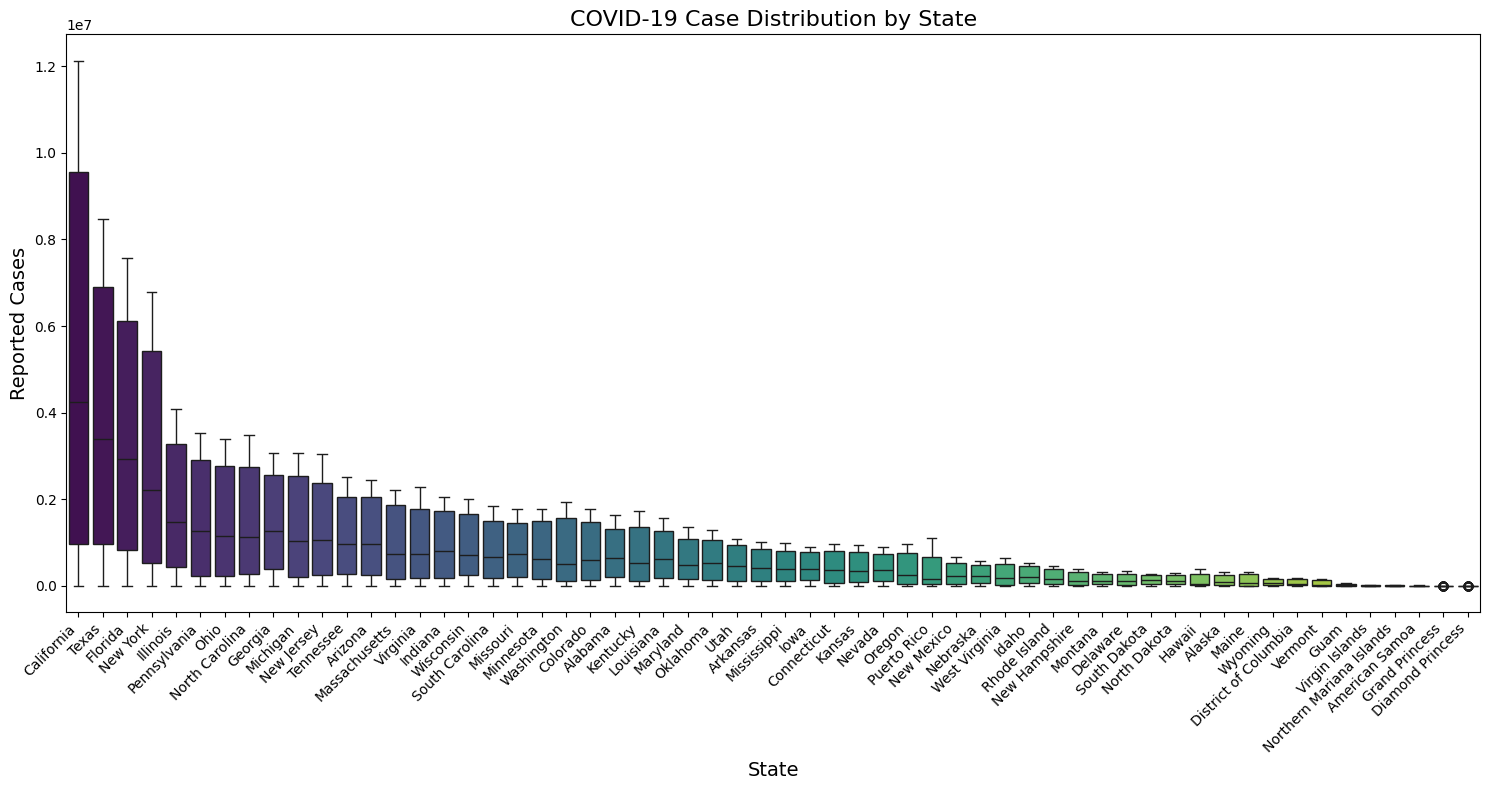

In [29]:
#Use Seaborn to create a grouped box plot of all reported states. Each boxplot
#should be a distinct state. Have the states ordered from most cases (FL) to fewest
#cases. (https://seaborn.pydata.org/examples/grouped_boxplot.html)


state_totals = covid_df.groupby('Province_State').sum().iloc[:, 11:]  # Exclude non-date columns
state_totals['Total'] = state_totals.sum(axis=1)  # Add a column for total cases
state_totals = state_totals.sort_values('Total', ascending=False)  # Sort states by total cases


state_totals = state_totals.reset_index()  
melted_data = state_totals.drop(columns=['Total']).melt(
    id_vars=['Province_State'], var_name='Date', value_name='Cases'
)


melted_data['Date'] = pd.to_datetime(melted_data['Date'], format='%m/%d/%y')


state_order = state_totals['Province_State']


plt.figure(figsize=(15, 8))
sns.boxplot(data=melted_data, x='Province_State', y='Cases', order=state_order, hue='Province_State', palette='viridis')

# Formatting
plt.title('COVID-19 Case Distribution by State', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Reported Cases', fontsize=14)
plt.xticks(rotation=45, fontsize=10, ha='right')

# Show the plot
plt.tight_layout()
plt.show()